# **Вход в ВК**

Импортируем библиотеки

In [1]:
!pip install vk_api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 1.2 MB/s eta 0:00:00


In [2]:
import vk_api

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

Напишем функцию, которая позволяет избежать двухфакторную аутентификацию

In [8]:
def auth_handler():
     """
    Вводит код аутентификации для входа через VK_api.

    Parameters
    ----------
    key : int
        Код аутентификации, который пришел в ВК
    b : Bool
        Получилось ли выполнить функцию

    Returns
    -------
    int
        Окно ввода, в которое надо ввести код аутентификации, который пришел в вк и удовлетворяет эту функцию
    """
    key = input("Authentication code: ")
    return key, False

Начнем сессию в ВК

In [9]:
login ='###' #тут был логин нашего аккаунта ВК, который мы после прогрузки убрали в соответсвии со знаниями, полученными с ЦГ)
password = '###' # с паролем аналогично

vk_session = vk_api.VkApi(login, password, auth_handler=auth_handler, app_id=6287487, client_secret="QbYic1K3lEV5kTGiqlq2")
vk_session.auth()

Authentication code: 401558


Точка входа в ВК

In [11]:
vk = vk_session.get_api()

# **Оформление датасета со стены сообщества в ВК "Одежда LolySweet Shop"**

Открываем пост на стене сообщества ВК в целях сборки данных со стены. Для этого скопируем id стены сообщества по любому открывшемуся посту

In [12]:
tools = vk_api.VkTools(vk)
wall_id = -59803960

Для анализа возьмем выборку из последних 1500 постов

In [13]:
wall = tools.get_all('wall.get', 4, {'owner_id': wall_id}, limit = 1500)

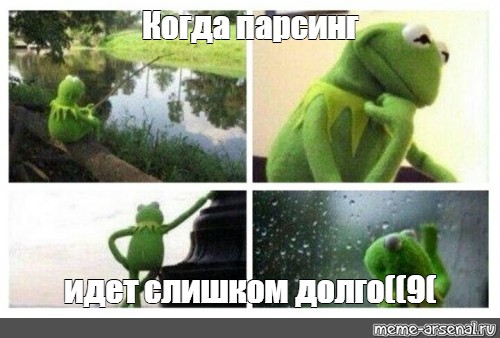

Создадим список словарей с каждым постом на стене сообщества

In [20]:
wall['items']

Создадим пустой датафрейм

In [15]:
df = pd.DataFrame()

Переобозначим индекс колонок датафрейма за id поста

In [16]:
df.index = [post['id'] for post in wall['items']]

Создадим столбец date, в котором будут храниться дата и время публикации поста в экспоненциальном формате (далее переведем это в формат datetime)

In [17]:
df['date'] = [post['date'] for post in wall['items']]

Соберем в колонки датафрейма данные о лайках, репостах, просмотрах и комментариях

In [18]:
col = ['likes', 'reposts', 'views', 'comments']
for c in col:
  df[c] = [post[c]['count'] for post in wall['items']]

В колонку text соберем текст из постов

In [19]:
df['text'] = [post['text'] for post in wall['items']]

Наш датафрейм готов! Гип-гип ура!

In [20]:
df.head()

,date,likes,reposts,views,comments,text
50966,1716628038,32,33,5083,2,Идеальная ассиметричная юбочка ♥️\n\n2290₽\n\n...
50965,1716556143,27,18,9157,0,Идеальные молочные купальники 🥰\n\n1690Р
50963,1716537180,35,33,9573,0,Боди с открытыми плечами 💔\n\n1690₽
50960,1716402552,65,58,11328,0,Комплекты для дома из молочного трикотажа 🧡\n\...
50958,1716378728,137,112,17666,1,Платья-миди из хлопкового муслина с цветочным ...


Теперь сохраним наш датасет в файл формата CSV

In [ ]:
df.to_csv('Dataframe_Girlzzz.csv')

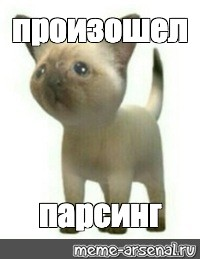